In [87]:
import numpy as np
from sklearn import datasets
from typing import *
from collections import *
import math
import heapq
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
iris = datasets.load_iris()

In [35]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [37]:
X, Y = iris["data"], iris["target"]
assert len(X) == len(Y)

In [61]:
print(f"Iris samples have {len(X[0])} features and labels {iris['target_names']}, {np.unique(Y)}")

Iris samples have 4 features and labels ['setosa' 'versicolor' 'virginica'], [0 1 2]


In [39]:

Label = int
Point = Iterable[float] 

In [40]:
# distance functions 
def ecDistance(point1:Point, point2:Point) -> float:
    # assert len(point1) == len(point2)
    ss = 0
    for f1, f2 in zip(point1, point2):
        ss += (f1 - f2) ** 2

    return math.sqrt(ss)

In [83]:
# knn
def knn(k: int, similarityHandler: Callable, x:Point, X: List[Point], Y: List[Label]) -> Label:
    # step 1: find k nearest neighbor
    # step 2: return most frequent target
    
    # step 1:
    distances = [(similarityHandler(x, x2), idx) for idx, x2 in enumerate(X)] # tuples of (distance, idx)
    topTuples = heapq.nsmallest(k, distances) # O(nlogk)
    counts = defaultdict(lambda: 0)
    ans = None
    maxC = 0
    for _, idx in topTuples:
        y = Y[idx] 
        counts[y] += 1
        if counts[y] > maxC:
            maxC = counts[y]
            ans = y

    return ans

def knnAll(k: int, similarityHandler: Callable, X_test: List[Point], X: List[Point], Y: List[Label]) -> List[Label]:
    Y_pred = []
    for x in (X_test):
        Y_pred.append(knn(k, similarityHandler, x, X_train, Y_train))
    return Y_pred

def accuracy(
        k: int,
        similarityHandler: Callable,
        X_train: List[Point], 
        X_test: List[Point], 
        Y_train: List[Label], 
        Y_test: List[Label]
    ) -> float:

        Y_pred = knnAll(k, similarityHandler, X_test, X_train, Y_train)

        correct = np.sum(np.equal(Y_test, Y_pred))
        return correct / len(Y_test)

def confusion(nLabels: int, Y_test: List[Label], Y_pred: List[Label]) -> List[List[int]]:
    # one row for each actual label
    # each row has labels 0-n
    data = []
    for _ in range(nLabels):
        data.append([0] * nLabels)
    for y, y_hat in zip(Y_test, Y_pred):
        data[y][y_hat] += 1

    return data
    

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [78]:
knn(3, ecDistance, X_test[0], X_train, Y_train), Y_test[0]

(1, 1)

In [79]:
accuracy(3, ecDistance, X_train, X_test, Y_train, Y_test)

0.98

In [80]:
Y_pred = knnAll(3, ecDistance, X_test, X_train, Y_train)

In [84]:
confusionMat = confusion(len(iris["target_names"]), Y_test, Y_pred)

In [90]:
# cm = confusion_matrix(Y_test, Y_pred, labels=[0, 1, 2])

In [96]:
cm = np.asarray(confusionMat)

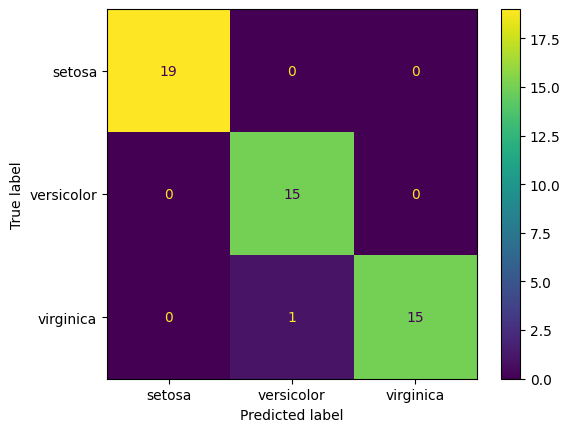

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris["target_names"])
disp.plot()
